#### Boston House Prices dataset 

The boston dataset was first published in 1978 in a paper [Hedonic Housing Prices and the Demand for Clean Air ](http://citeseerx.ist.psu.edu/viewdoc/download?doi=10.1.1.926.5532&rep=rep1&type=pdf) by Harrison and Rubenfield.  506 entries represent aggregated data about 14 features for homes in Boston and capture the Crime rate (CRIM), number of Rooms(RM), age(AGE) of owners and more. This dataset is widely used in many machine learning papers that address regression problems.

#### Aims of this notebook:

1. Use **descriptive statistics** and plots to describe the Boston House Prices dataset. 
2. Use **inferential statistics** to analyse whether there is a significant difference in median house prices between houses that are along the Charles river and those that aren’t. You should explain and discuss your findings within the notebook. 
3. Use **keras** to create a neural network that can predict the median house price based on the other variables in the dataset.

### Libraries used in this project

In [75]:
import numpy as np
import pandas as pd
# plots
import seaborn as sns
import matplotlib.pyplot as plt
# for creating folder for plots
import os
# statistical analysis
import researchpy as rp
import statsmodels.api as sm
#for interactive widgets for charts
from ipywidgets import interact, interactive, fixed
import ipywidgets as widgets
# machine learning
from keras.models import Sequential
from keras.layers import Dense
from sklearn import preprocessing

In [41]:
# importing the boston housing dataset
from sklearn.datasets import load_boston
boston_df = load_boston()

## Exploring the data

In [42]:
# print the keys in the dataset
print(boston_df.keys())

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])


To learn more about this dataset you can print the description

In [43]:
# DESC should tell us what the data is about
print(boston_df.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [44]:
# the feature name contain the columns of the dataset
print(boston_df.feature_names)

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


From inspecting the boston_df.filename, we can see that feature_names should be the columns and boston_df.data should be the rows

In [45]:
# create a new dataset called Boston using the feature_names as the columns
boston = pd.DataFrame(boston_df.data, columns=boston_df.feature_names)
# We are missing one column (MEDV). According to DESCR, Median Value (attribute 14) is usually the target.
boston['MEDV'] = boston_df.target

# Median value of owner-occupied homes in $1000's 
boston['MEDV'] = (boston['MEDV']*1000)
# printing the shape
print("Boston housing dataset has {} data points with {} variables each.".format(*boston.shape))

# glance at the data
boston.head()

Boston housing dataset has 506 data points with 14 variables each.


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24000.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21600.0
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34700.0
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33400.0
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36200.0


#### Cleaning the data 
This is important for the machine learning part of the project
- check for null values, df.isnull().sum(). Luckily there is no null values in the dataset
- check for duplicates

There are duplicate

In [46]:
dups_color = boston.pivot_table(index=['MEDV'], aggfunc='size')
print (dups_color)

MEDV
5000.0      2
5600.0      1
6300.0      1
7000.0      2
7200.0      3
           ..
46700.0     1
48300.0     1
48500.0     1
48800.0     1
50000.0    16
Length: 229, dtype: int64


In [47]:
boston.drop_duplicates(subset ="MEDV")
boston

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24000.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21600.0
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34700.0
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33400.0
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36200.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22400.0
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20600.0
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23900.0
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22000.0


In [56]:
#df = boston.loc[boston['MEDV'] ==50.0]
#df

## Part 1. Descriptive Statistics
Use **descriptive statistics** and plots to describe the Boston House Prices dataset.

Here we can quickly see the mean, standard deviation, min, max and various percentiles for the dataset.

In [57]:
# describe() gives us a quick overview of the dataset
summary = boston.describe()
summary = summary.transpose()
summary.round(2)

,count,mean,std,min,25%,50%,75%,max
CRIM,506.0,3.61,8.60,0.01,0.08,0.26,3.68,88.98
ZN,506.0,11.36,23.32,0.00,0.00,0.00,12.50,100.00
INDUS,506.0,11.14,6.86,0.46,5.19,9.69,18.10,27.74
CHAS,506.0,0.07,0.25,0.00,0.00,0.00,0.00,1.00
NOX,506.0,0.55,0.12,0.38,0.45,0.54,0.62,0.87
RM,506.0,6.28,0.70,3.56,5.89,6.21,6.62,8.78
AGE,506.0,68.57,28.15,2.90,45.02,77.50,94.07,100.00
DIS,506.0,3.80,2.11,1.13,2.10,3.21,5.19,12.13
RAD,506.0,9.55,8.71,1.00,4.00,5.00,24.00,24.00
TAX,506.0,408.24,168.54,187.00,279.00,330.00,666.00,711.00


In [58]:
prices = boston['MEDV']
# TODO: Minimum price of the data
minimum_price = np.min(prices)

# TODO: Maximum price of the data
maximum_price = np.max(prices)

# TODO: Mean price of the data
mean_price = np.mean(prices)

# TODO: Median price of the data
median_price = np.median(prices)

# TODO: Standard deviation of prices of the data
std_price = np.std(prices)

# Show the calculated statistics
print ("Statistics for Boston housing dataset:")
print ("Minimum price: ${:,.2f}".format(minimum_price))
print ("Maximum price: ${:,.2f}".format(maximum_price))
print ("Mean price: ${:,.2f}".format(mean_price))
print( "Median price ${:,.2f}".format(median_price))
print ("Standard deviation of prices: ${:,.2f}".format(std_price))

Statistics for Boston housing dataset:
Minimum price: $5,000.00
Maximum price: $50,000.00
Mean price: $22,532.81
Median price $21,200.00
Standard deviation of prices: $9,188.01


While researching this topic, I read this blog post:[Analysis of the Boston Housing Prices Dataset](https://rpubs.com/joelrudinas03/BostonHousingPrices) by Joel Jr Ffc Rudinas in R which uses a mixed correlation matrix to quickly investigate relationships between the variables. After looking for ways to do this in Python, I settled on the correlation heatmap using Seaborn:

- **Positive Correlation**: both variables change in the same direction (light color).

- **Neutral Correlation**: No relationship in the change of the variables.

- **Negative Correlation**: variables change in opposite directions (dark color).

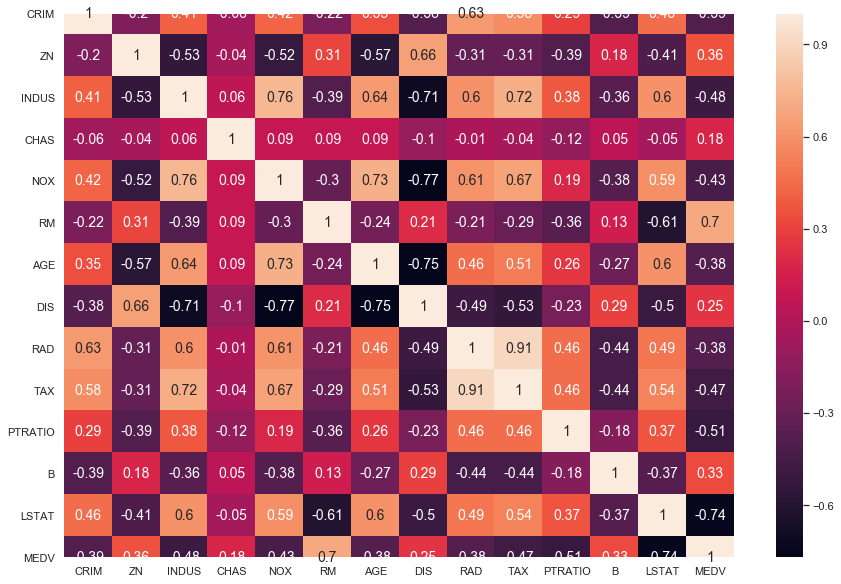

In [52]:
# using a correlation heatmap, we can quickly get a sense for any relationships between the dataset. The darkest and lightest squares show variables which have a strong relationship. 
plt.figure(figsize=(15, 10))
cmap=sns.cubehelix_palette(50, light=0.95, dark=0.15)

# rounding to 2 decimal places and increasing the font size
sns.heatmap(data=boston.corr().round(2), annot=True, annot_kws={"size":14})
#plt.tight_layout()

#save the plot
plt.savefig('plots/bostondatasetcorrelation.png')

# show plot
plt.show()


From the correlation heatmap

- We can see a positive correlation between MEDV and RM at 0.7. When the average number of rooms increase the price of the house also increases.
- Negative correlation between MEDV and LSTAT (% lower status of the population): -0.74
- Negative correlation between MEDV and PTRatio (pupil-teacher ratio by town): (-0.51)
- Negative correlation between MEDV and INDUS (proportion of non-retail business acres per town) (-0.48)

Let's plot these to see more details:

In [119]:
if not os.path.exists("plots/box"):
    os.makedirs("plots/box")
    
    
@interact


def box_plt(datalist = list(boston.columns)):
    for i, value in enumerate(boston):
        sns.boxplot(boston[datalist], color=random.choice(colors), orient="v")
        plt.savefig("plots/box/box_" + str(i) + ".png")
       

interactive(children=(Dropdown(description='datalist', options=('CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'A…

In [53]:
#from __future__ import print_function
#from ipywidgets import interact, interactive, fixed
#import ipywidgets as widgets

In [116]:
sns.set(style="whitegrid",  rc={'figure.figsize':(11.7,8.27)})

df= boston[['RM','LSTAT','CRIM','INDUS','PTRATIO', 'MEDV']]

#create a folder to add the plots to
if not os.path.exists("plots/linearregression/"):
    os.makedirs("plots/linearregression/")
    
@interact
def scatter_plot(x=list(df.select_dtypes('number').columns)):
    
    for i, col in enumerate(df):
       sns.regplot(x=x, y='MEDV', data=df)
       plt.savefig("plots/linearregression/linearreg_" + str(i) + ".png")
   


interactive(children=(Dropdown(description='x', options=('RM', 'LSTAT', 'CRIM', 'INDUS', 'PTRATIO', 'MEDV'), v…

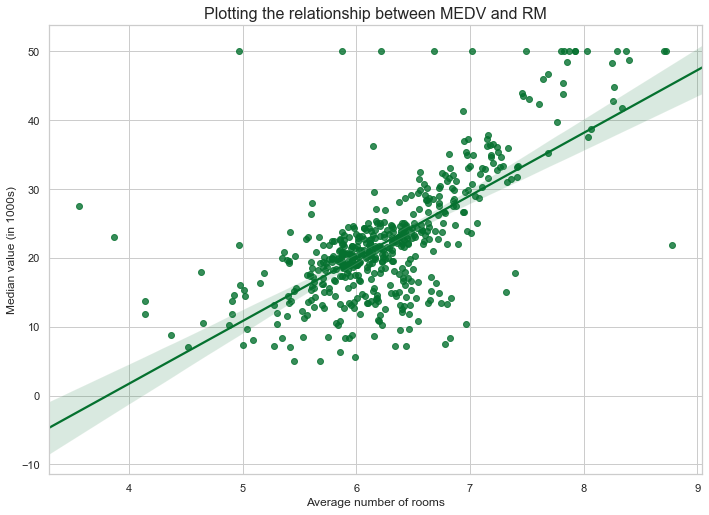

In [92]:
sns.set(style="whitegrid", palette="BuGn_r", rc={'figure.figsize':(11.7,8.27)})

#sns.scatterplot(x='RM', y='MEDV', data=boston)
sns.regplot(x='RM', y='MEDV', data=boston)
title="Plotting the relationship between MEDV and RM"

# Set x-axis label
plt.xlabel('Average number of rooms')
# Set y-axis label
plt.ylabel('Median value (in 1000s)')

# increasing font size
plt.title(title, fontsize=16)

#save the plot
plt.savefig('plots/medvvrmrelationship.png')

# Show the plot
plt.show()

From the correlation heatmap, we can we a negative correlation between MEDV and LSTAT at -0.74. When the % of lower status of the populations increases the value of houses decrease.

In [1]:
sns.set(style="whitegrid", palette="BuGn_r", rc={'figure.figsize':(11.7,8.27)})


sns.regplot(x='LSTAT', y='MEDV', data=boston)
title="Plotting the relationship between MEDV and LSTAT"

# increasing font size
plt.title(title, fontsize=16)

# Set x-axis label
plt.xlabel('% lower status of the population')
# Set y-axis label
plt.ylabel('Median value of owner-occupied homes')

#save the plot
plt.savefig('plots/medvandlstatrelationship.png')

# Show the plot
plt.show()

NameError: name 'sns' is not defined

# Part 2. Inferential Statistics

Use inferential statistics to analyse whether there is a significant difference in median house prices between houses that are along the Charles river and those that aren’t. 

In [16]:
# Gettin summary statistics of MEDV for the population
rp.summary_cont(boston['MEDV'])

,Variable,N,Mean,SD,SE,95% Conf.,Interval
0,MEDV,506.0,22.532806,9.197104,0.408861,21.729528,23.336085


In [17]:
# let's look at the data grouped by whether they bound the River or otherwise.
rp.summary_cont(boston['MEDV'].groupby(boston['CHAS']))

,N,Mean,SD,SE,95% Conf.,Interval
CHAS,,,,,,
0.0,471,22.093843,8.831362,0.406928,21.295417,22.892269
1.0,35,28.440000,11.816643,1.997377,24.467986,32.412014


From the above summary we can see that the houses bound the river have a higher mean MEDV. Let's visualise this with a boxplot.

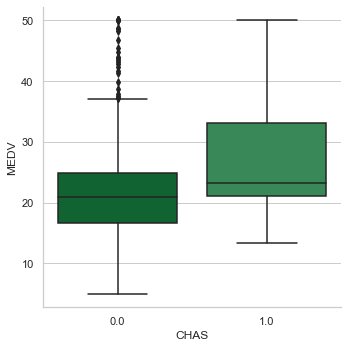

In [18]:
sns.catplot(x='CHAS', y='MEDV', kind="box", data=boston)

#save the plot
plt.savefig('plots/boxplot.png')

In [19]:
riverhouse_df = boston[boston['CHAS']==1.0]
other_df = boston[boston['CHAS']==0.0]

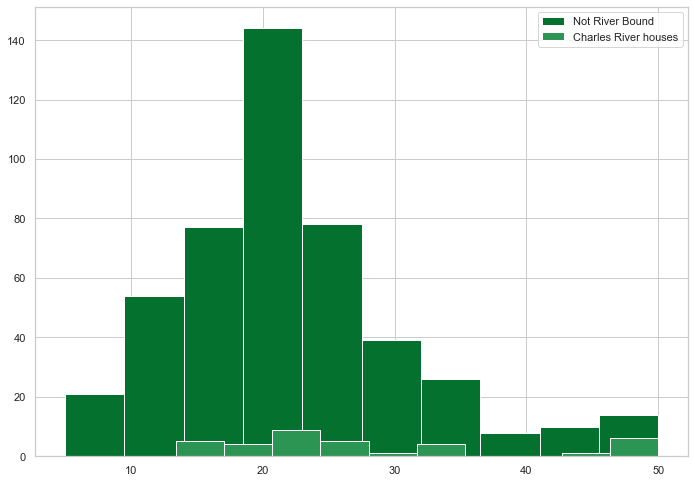

In [20]:
import matplotlib.pyplot as plt
plt.hist(other_df['MEDV'], label='Not River Bound')
plt.hist(riverhouse_df['MEDV'], label='Charles River houses')

plt.legend()

plt.savefig('plots/hist.png')

plt.show()

In [35]:
#add info about the One way Anova

In [36]:
#oneway anova
import scipy.stats as stats
stats.f_oneway(other_df['MEDV'], riverhouse_df['MEDV'])

F_onewayResult(statistic=15.971512420371955, pvalue=7.390623170520815e-05)

Check which dataset has the highest mean the population or the sample?

In [37]:
Mean1 = other_df.MEDV.mean()
Mean2 = riverhouse_df.MEDV.mean()
print("Mean price Boston house dataset (population):", Mean1)
print("mean price Charles river House (sample):", Mean2)

Mean price Boston house dataset (population): 22.093842887473482
mean price Charles river House (sample): 28.44


### Z-test

Comparing the mean of the house not by the river (22.09) and river bound (28.44) looks much bigger however we can use a Z-TEST to check if it is statistically significant. We use use a z-test when the sample is greater than 30 and riverhouse_df has 35.

In [38]:
# Convert into two arrays
X2 = np.array(other_df.MEDV)
Y2 = np.array(riverhouse_df.MEDV)

In [39]:
# import the package for performing Z Test
from statsmodels.stats.weightstats import ztest

In [40]:
ztest(Y2,x2=None,value=Mean1)

(3.1772450812074404, 0.0014868133390002274)

p value is 0.0014868133390002274 which is lower than 0.05 and therefore is statistically significant.

# 3. Predict

Use keras to create a neural network that can predict the median house price based on the other variables in the dataset.

In [81]:
# first neural network with keras tutorial
#import libraries
import numpy as np
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import train_test_split

In [82]:
#input features (X) 
X = boston.iloc[:, 0:13]
# What we want to predict
y = boston.iloc[:,13]

In [89]:
#Transforms features by scaling each feature to a given range
min_max_scaler = preprocessing.MinMaxScaler()
X_scale = min_max_scaler.fit_transform(X)

#Split arrays or matrices into random train and test subsets
X_train, X_val_and_test, Y_train, Y_val_and_test = train_test_split(X_scale, y, test_size=0.3)

#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
X_val, X_test, Y_val, Y_test = train_test_split(X_val_and_test, Y_val_and_test, test_size=0.5)
print(X_train.shape, X_val.shape, X_test.shape, Y_train.shape, Y_val.shape, Y_test.shape)

(354, 13) (76, 13) (76, 13) (354,) (76,) (76,)


The first thing to get right is to ensure the input layer has the right number of input features. This can be specified when creating the first layer with the input_dim argument and setting it to 13 for the 13 input variables.

In [90]:
# define the keras model
model = Sequential([
    Dense(32, activation='relu', input_shape=(13,)),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid'),
])

In [91]:
# ‘sgd’ refers to stochastic gradient descent 
# compile the keras model
model.compile(optimizer='sgd',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [92]:
hist = model.fit(X_train, Y_train,
          batch_size=32, epochs=100,
          validation_data=(X_val, Y_val))

Train on 354 samples, validate on 76 samples
Epoch 1/100
354/354 [==============================] - 1s 2ms/step - loss: nan - accuracy: 0.0000e+00 - val_loss: nan - val_accuracy: 0.0000e+00
Epoch 2/100
354/354 [==============================] - 0s 90us/step - loss: nan - accuracy: 0.0000e+00 - val_loss: nan - val_accuracy: 0.0000e+00
Epoch 3/100
354/354 [==============================] - 0s 97us/step - loss: nan - accuracy: 0.0000e+00 - val_loss: nan - val_accuracy: 0.0000e+00
Epoch 4/100
354/354 [==============================] - 0s 107us/step - loss: nan - accuracy: 0.0000e+00 - val_loss: nan - val_accuracy: 0.0000e+00
Epoch 5/100
354/354 [==============================] - 0s 104us/step - loss: nan - accuracy: 0.0000e+00 - val_loss: nan - val_accuracy: 0.0000e+00
Epoch 6/100
354/354 [==============================] - 0s 103us/step - loss: nan - accuracy: 0.0000e+00 - val_loss: nan - val_accuracy: 0.0000e+00
Epoch 7/100
354/354 [==============================] - 0s 104us/step - loss: 

354/354 [==============================] - 0s 89us/step - loss: nan - accuracy: 0.0000e+00 - val_loss: nan - val_accuracy: 0.0000e+00
Epoch 57/100
354/354 [==============================] - 0s 88us/step - loss: nan - accuracy: 0.0000e+00 - val_loss: nan - val_accuracy: 0.0000e+00
Epoch 58/100
354/354 [==============================] - 0s 85us/step - loss: nan - accuracy: 0.0000e+00 - val_loss: nan - val_accuracy: 0.0000e+00
Epoch 59/100
354/354 [==============================] - 0s 86us/step - loss: nan - accuracy: 0.0000e+00 - val_loss: nan - val_accuracy: 0.0000e+00
Epoch 60/100
354/354 [==============================] - 0s 84us/step - loss: nan - accuracy: 0.0000e+00 - val_loss: nan - val_accuracy: 0.0000e+00
Epoch 61/100
354/354 [==============================] - 0s 81us/step - loss: nan - accuracy: 0.0000e+00 - val_loss: nan - val_accuracy: 0.0000e+00
Epoch 62/100
354/354 [==============================] - 0s 89us/step - loss: nan - accuracy: 0.0000e+00 - val_loss: nan - val_accur

### Ref:
https://medium.com/@haydar_ai/learning-data-science-day-9-linear-regression-on-boston-housing-dataset-cd62a80775ef
https://subscription.packtpub.com/book/big_data_and_business_intelligence/9781789804744/1/ch01lvl1sec11/our-first-analysis-the-boston-housing-dataset

https://towardsdatascience.com/machine-learning-project-predicting-boston-house-prices-with-regression-b4e47493633d

### inferential statistics
https://www.datavedas.com/inferential-statistics-in-python/
https://en.wikipedia.org/wiki/P-value

## Correlation
https://machinelearningmastery.com/how-to-use-correlation-to-understand-the-relationship-between-variables/

https://rpubs.com/joelrudinas03/BostonHousingPrices

https://realpython.com/linear-regression-in-python/

In [ ]:
import numpy as np
from sklearn.linear_model import LinearRegression

In [ ]:
x = boston['MEDV']
y = boston['LSTAT']

In [ ]:
model = LinearRegression()


In [ ]:
model.fit(x, y)

In [ ]:
# Plot the line and the points.
plt.plot(x, y, 'k.')